# Classification, Sentiment Analysis and Topic Modeling

***Yilun Xu, MACSS Student, Division of the Social Sciences, University of Chicago***

## Import Packages

In [1]:
import lucem_illud_2020 

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

%matplotlib inline

import itertools
import json
import warnings
warnings.filterwarnings('ignore')
import random
from collections import Counter
import re
import string
from wordcloud import STOPWORDS,WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

nltk.download('vader_lexicon')
nltk.download('punkt')
from gensim.models import ldaseqmodel
import glob
random.seed(1234)
import pyLDAvis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Preparation

In this part, we will read all the twitter data and do basic processing on them. The tweet data we used were the tweets related to Covid19 in March. We will extract some of the columns in these datasets and calculate their sentiment scores using polarity scores based on the tweet content. After processing all the tweets, we divided them into three data sets according to the time they were generated: early, middle and late.

The early tweets included all tweets before March 12. The reason we chose this date as the time node is that this day is the day when Covid19 was determined to be a global pandemic. Mid-term tweets include all data from March 12 to March 20, while late tweets include all data from March 21 to March 31. In different analysis sections, we will use Early, Middle and Late to refer to the three datasets.

In [2]:
def new_sentence(text):
    '''
    This function is to clean a text with some regular expression methods. We
    want to return a new string with all marks and numbers deleted and all
    letters in the lower case format.

    Input:
    text (string): a text which needs to be processed.

    Ouput:
    new (string): a processed text.
    '''

    text = re.sub(r'[{}]+'.format(string.punctuation), '', text)
    text = re.sub(r'[{}]+'.format(string.digits), '', text)
    word_list = text.strip().lower().split()
    picked_words = [word for word in word_list if word not in STOPWORDS]
    new = ' '.join(picked_words)
    return new

In [3]:
def add_sentiment(path):
    '''
    This function is to get a DataFrame from a csv, extract necessary columns 
    and add a column describing the sentiment category of the text.
    
    Input:
    path (string): the path of a csv to be read
    
    Output:
    df (DataFrame): a processed DataFrame
    '''
    df = pd.read_csv(path)
    df = df[['status_id','user_id','created_at','screen_name','text','followers_count','friends_count']]
    df['text'] = df['text'].astype(str)
    df['clean_text'] = df['text'].apply(new_sentence)
    SID = SentimentIntensityAnalyzer()
    df['sentiment_scores'] = df['clean_text'].apply(SID.polarity_scores)
    return df

In [4]:
t_early = add_sentiment('slim_tweets_0125\\2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')
t_12 = add_sentiment('slim_tweets_0125\\2020-03-12 Coronavirus Tweets.CSV')
t_13 = add_sentiment('slim_tweets_0125\\2020-03-13 Coronavirus Tweets.CSV')
t_14 = add_sentiment('slim_tweets_0125\\2020-03-14 Coronavirus Tweets.CSV')
t_15 = add_sentiment('slim_tweets_0125\\2020-03-15 Coronavirus Tweets.CSV')
t_16 = add_sentiment('slim_tweets_0125\\2020-03-16 Coronavirus Tweets.CSV')
t_17 = add_sentiment('slim_tweets_0125\\2020-03-17 Coronavirus Tweets.CSV')
t_18 = add_sentiment('slim_tweets_0125\\2020-03-18 Coronavirus Tweets.CSV')
t_19 = add_sentiment('slim_tweets_0125\\2020-03-19 Coronavirus Tweets.CSV')
t_20 = add_sentiment('slim_tweets_0125\\2020-03-20 Coronavirus Tweets.CSV')
t_middle = pd.concat([t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20],axis=0)
t_21 = add_sentiment('slim_tweets_0125\\2020-03-21 Coronavirus Tweets.CSV')
t_22 = add_sentiment('slim_tweets_0125\\2020-03-22 Coronavirus Tweets.CSV')
t_23 = add_sentiment('slim_tweets_0125\\2020-03-23 Coronavirus Tweets.CSV')
t_24 = add_sentiment('slim_tweets_0125\\2020-03-24 Coronavirus Tweets.CSV')
t_25 = add_sentiment('slim_tweets_0125\\2020-03-25 Coronavirus Tweets.CSV')
t_26 = add_sentiment('slim_tweets_0125\\2020-03-26 Coronavirus Tweets.CSV')
t_27 = add_sentiment('slim_tweets_0125\\2020-03-27 Coronavirus Tweets.CSV')
t_28 = add_sentiment('slim_tweets_0125\\2020-03-28 Coronavirus Tweets.CSV')
t_29 = add_sentiment('slim_tweets_0125\\2020-03-29 Coronavirus Tweets.CSV')
t_30 = add_sentiment('slim_tweets_0125\\2020-03-30 Coronavirus Tweets.CSV')
t_31 = add_sentiment('slim_tweets_0125\\2020-03-31 Coronavirus Tweets.CSV')
t_late = pd.concat([t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31],axis=0)
tweets = [t_early,t_middle,t_late]

## WordCloud

In this part, we want to make a word cloud for the tweets in each stage. This section serves more like an EDA process to help us get a basic understanding of the tweets.

Text(0.5, 1.02, 'WordCloud for Tweets in Early March')

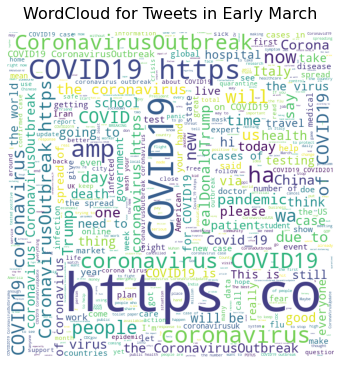

In [5]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_early['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Early March',size = 16,y = 1.02)

Text(0.5, 1.02, 'WordCloud for Tweets in Middle March')

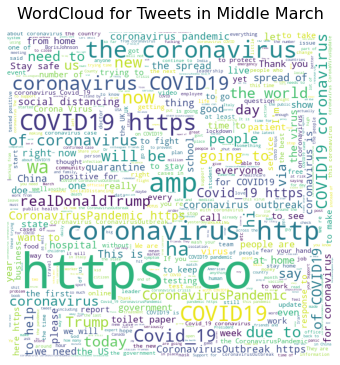

In [6]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_middle['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Middle March',size = 16,y = 1.02)

Text(0.5, 1.02, 'WordCloud for Tweets in Late March')

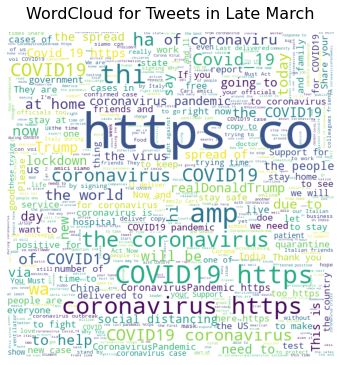

In [7]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_late['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Late March',size = 16,y = 1.02)

## Clustering

### Cluster Number Selection

In this part, we want to pick the optimal cluster number. We will use the average silhouette score as the standard. We will pick the best one from the list: 3, 4, 5 and 6. We will calculate the Silhouette score for each possible cluster number for each tweet dataset in the three stages, and finally pick the best number.

In [8]:
def plotSilhouette(n_clusters, X, reduced_data, pca):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

#### Early

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


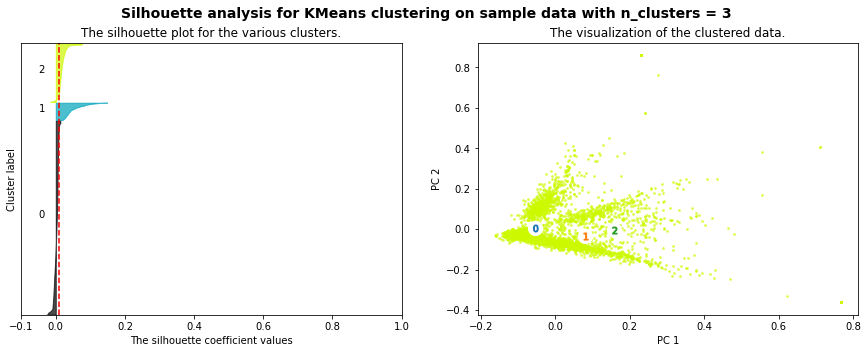

For n_clusters = 3, The average silhouette_score is : 0.008


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


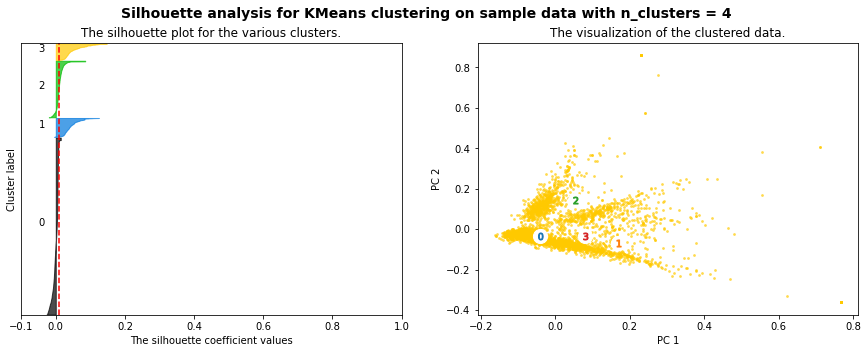

For n_clusters = 4, The average silhouette_score is : 0.008


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


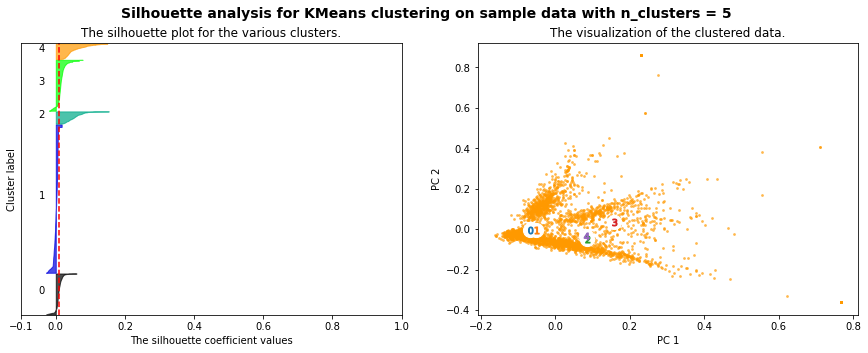

For n_clusters = 5, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


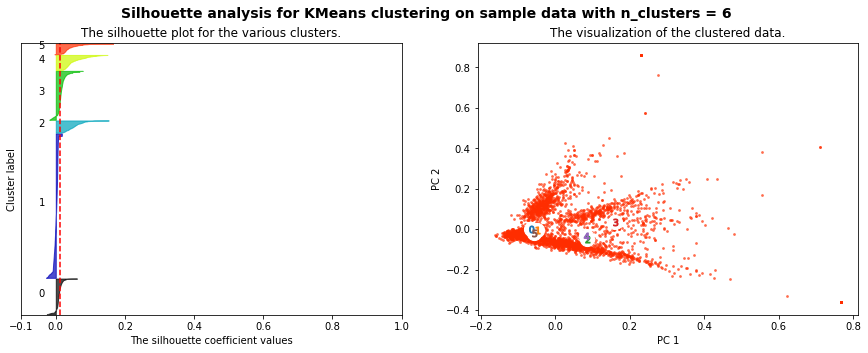

For n_clusters = 6, The average silhouette_score is : 0.011


In [9]:
possible_numbers = [3,4,5,6]
exampleTFVectorizer_early = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
exampleTFVects_early = exampleTFVectorizer_early.fit_transform(t_early['text'])
X = exampleTFVects_early.toarray()
PCA = sklearn.decomposition.PCA
pca_early = PCA(n_components = 2).fit(exampleTFVects_early.toarray())
reduced_data_early = pca_early.transform(exampleTFVects_early.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_early,pca_early)

#### Middle

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


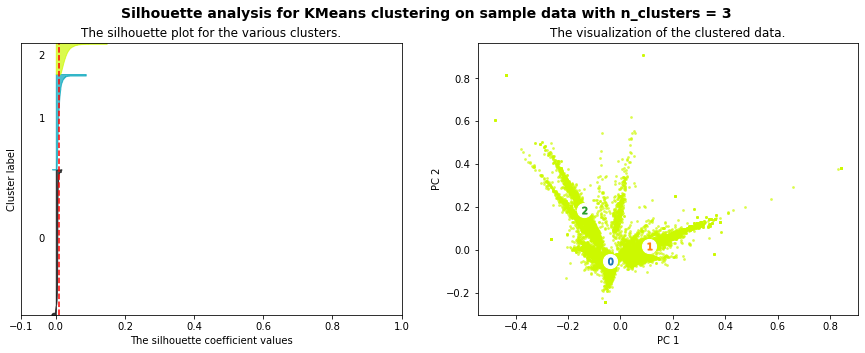

For n_clusters = 3, The average silhouette_score is : 0.009


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


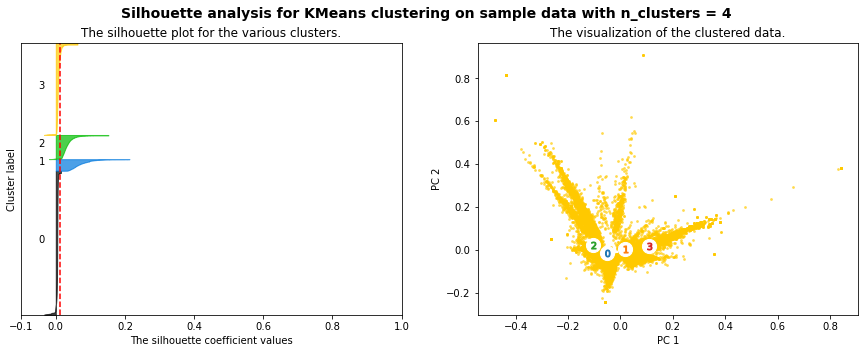

For n_clusters = 4, The average silhouette_score is : 0.011


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


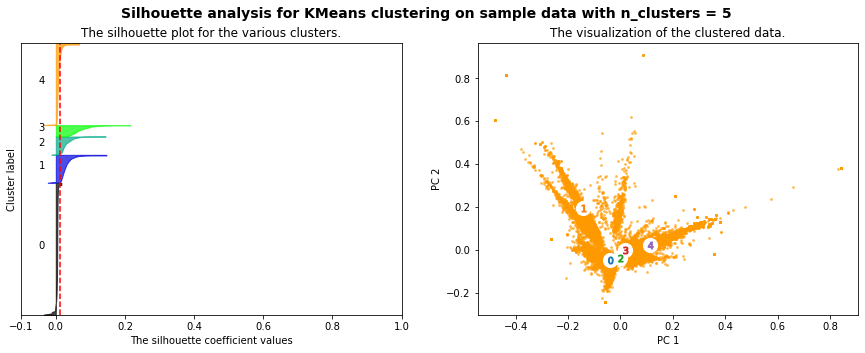

For n_clusters = 5, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


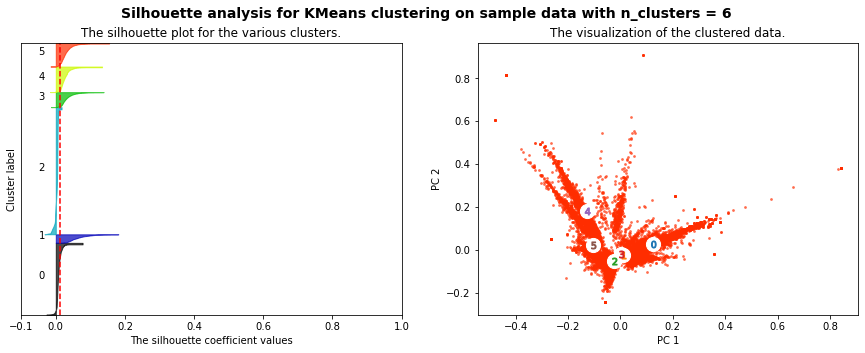

For n_clusters = 6, The average silhouette_score is : 0.013


In [10]:
exampleTFVectorizer_middle = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
exampleTFVects_middle = exampleTFVectorizer_middle.fit_transform(t_middle['text'])
X = exampleTFVects_middle.toarray()
PCA = sklearn.decomposition.PCA
pca_middle = PCA(n_components = 2).fit(exampleTFVects_middle.toarray())
reduced_data_middle = pca_middle.transform(exampleTFVects_middle.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_middle, pca_middle)

#### Late

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


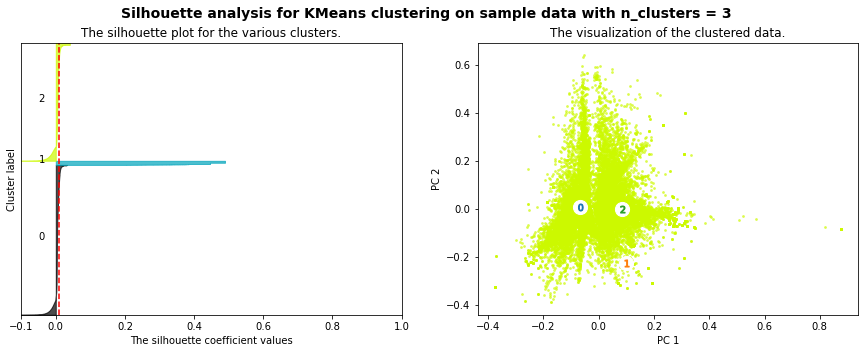

For n_clusters = 3, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


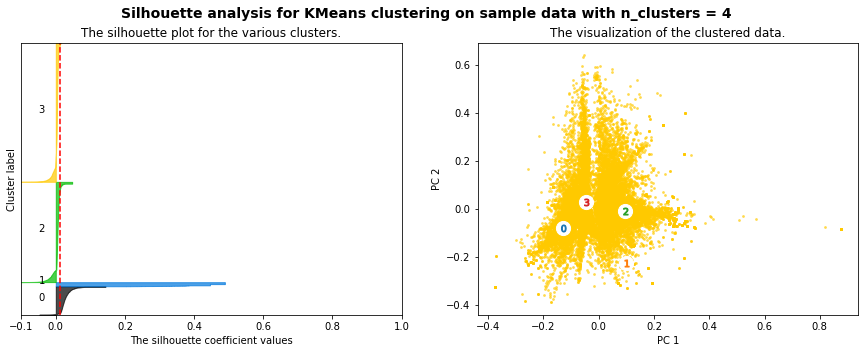

For n_clusters = 4, The average silhouette_score is : 0.012


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


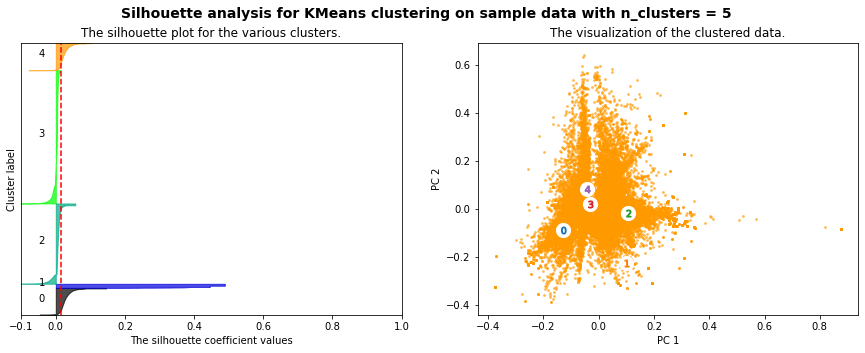

For n_clusters = 5, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


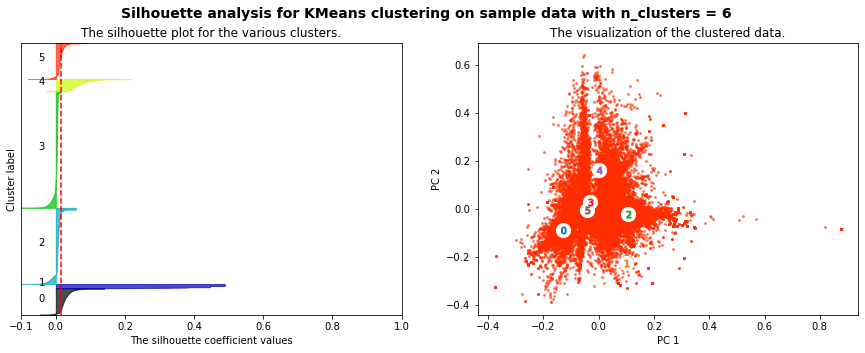

For n_clusters = 6, The average silhouette_score is : 0.016


In [11]:
exampleTFVectorizer_late = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
exampleTFVects_late = exampleTFVectorizer_late.fit_transform(t_late['text'])
X = exampleTFVects_late.toarray()
PCA = sklearn.decomposition.PCA
pca_late = PCA(n_components = 2).fit(exampleTFVects_late.toarray())
reduced_data_late = pca_late.transform(exampleTFVects_late.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_late, pca_late)

According to the above results, we found the for all the three tweets datasets, the best cluster number is 6.

### K-means and Hierarchical Clustering with Wald's Method

According to the previous analysis, when we are using K-means and Hierarchical Clustering with Wald's Method to cluster the datasets, we will assign a total of 6 different sentiment categories to each observation, including negative, pretty negative, slightly negative, slightly positive, pretty positive and positive. We will see how these two methods work in the three datasets respectively.

In [12]:
colors = {'negative':'purple','pretty negative':'blue','slightly negative':'green','slightly positive':'yellow',
         'pretty positive':'orange','positive':'red'}
colors = {0:'purple',1:'blue',2:'green',3:'yellow',4:'orange',5:'red'}

In [13]:
def convert_cluster(score):
    '''
    This function is to convert a sentiment analysis score into a sentiment
    analysis label. The ranges for different categories are as follows:
    negative: [-1, -0.2)
    pretty negative: [-0.2, -0.05)
    slightly negative: [-0.05,0)
    slightly positive: [0, 0.05)
    pretty positive;[0.05,0.2)
    positive:[0.2, 1]

    Input:
    score (number): the analysis score

    Output:
    the analysis category (string)
    '''
    if score < -0.2:
        return 'negative'
    if score >= -0.2 and score <-0.05:
        return 'pretty negative'
    if score >=-0.05 and score <0:
        return 'slightly negative'
    if score >= 0 and score <0.05:
        return 'slightly positive'
    if score >= 0.05 and score <0.2:
        return 'pretty positive'
    return 'positive'
for df in tweets:
    df['sentiment'] = df['sentiment_scores'].apply(lambda x: convert_cluster(x['compound']))

#### early

In [14]:
numClusters = 6
km_early = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_early.fit(exampleTFVects_early)
exampleTFVectorizer_early.vocabulary_.get('trump')

904

We trained the model, and we can consult the word 'trump' in the model.

In [15]:
exampleTransformer_early = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_early)
exampleTF_early = exampleTransformer_early.transform(exampleTFVects_early)
# Let's see the shape of the transformed vectors.
print(exampleTF_early.shape)

(4144, 1000)


In [16]:
try:
    print(exampleTFVectorizer_early.vocabulary_['covid'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

211


We can also consult other words in the model, and we can also get the list for available words in the model.

In [17]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_early['sentiment'], km_early.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_early['sentiment'], km_early.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_early['sentiment'], km_early.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_early['sentiment'], km_early.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [18]:
terms = exampleTFVectorizer_early.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_early.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 covid
 19
 coronavirus
 coronavirusoutbreak
 pandemic
 outbreak
 covid_19
 covid2019
 cases
 health


Cluster 1:
 people
 coronavirus
 coronavirusoutbreak
 don
 italy
 just
 need
 virus
 think
 infected


Cluster 2:
 coronavirus
 covid_19
 covid2019
 covidー19
 corona
 coronavirusupdate
 coronavirusoutbreak
 china
 covid
 pandemic


Cluster 3:
 amp
 coronavirus
 just
 pandemic
 like
 time
 don
 health
 virus
 trump


Cluster 4:
 cases
 confirmed
 new
 total
 coronavirus
 deaths
 coronavirusoutbreak
 reported
 china
 number


Cluster 5:
 coronavirusoutbreak
 coronavirus
 covid2019
 coronavirusupdate
 corona
 covidー19
 virus
 realdonaldtrump
 just
 trump




In [19]:
components = pca_early.components_
keyword_ids_early = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from the kmeans model.
words_early = [terms[i] for i in keyword_ids_early]#Turn the ids into words.
x = components[:,keyword_ids_early][0,:] #Find the coordinates of those words in the biplot.
y = components[:,keyword_ids_early][1,:]

In [20]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_early['sentiment']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('negative', 'blue'), ('pretty negative', 'green'), ('slightly negative', 'yellow'), ('slightly positive', 'pink'), ('pretty positive', 'orange'), ('positive', 'red')])


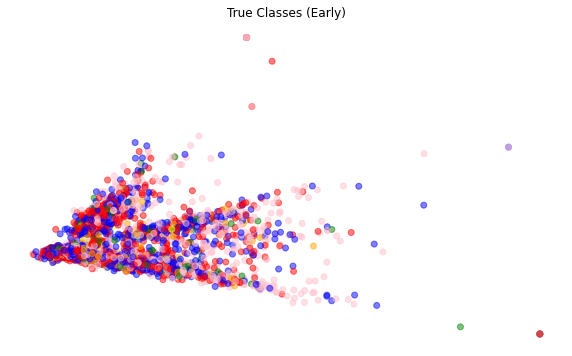

In [21]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Early)')
plt.show()

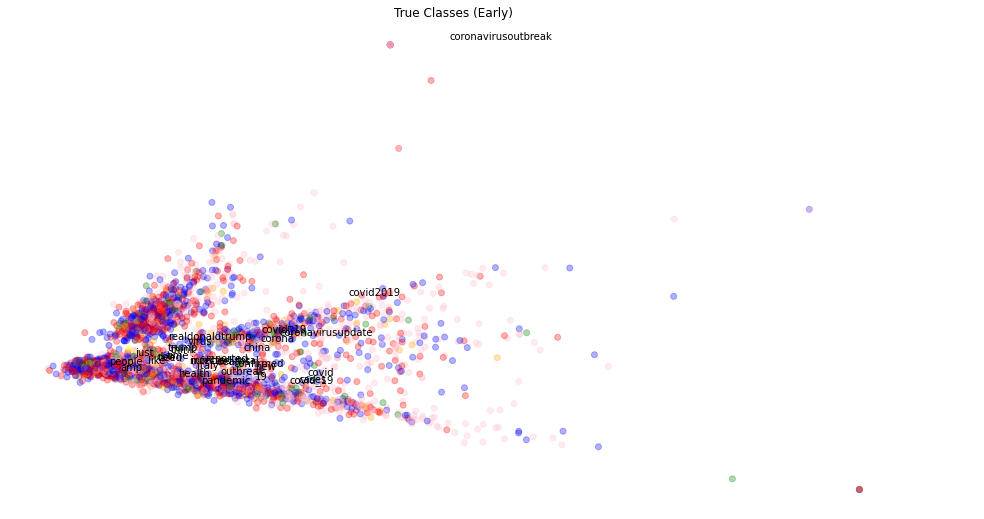

In [22]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words_early):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Early)')
plt.show()

In the above two figures, we get the clustered true labels of the observations, one without annotated vocabulary and one with annotated vocabulary.

In [23]:
sentimentCategories = list(colordict.keys())
colors_p = [colordict[sentimentCategories[l]] for l in km_early.labels_]

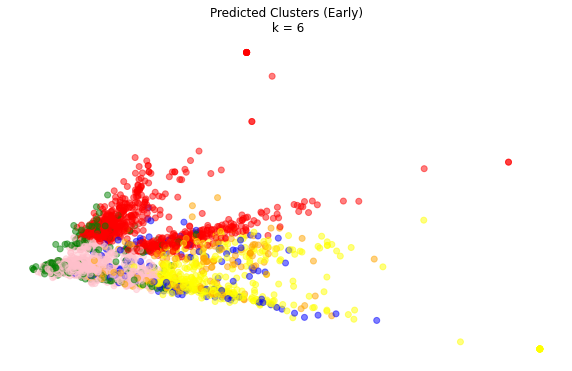

In [24]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Early)\n k = 6')
plt.show()

In the above figure, we get the clustered predicted labels of the observations.

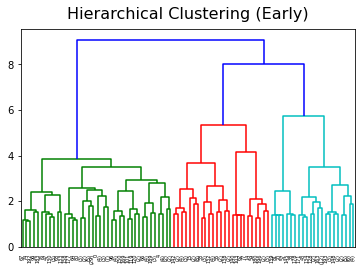

In [25]:
hier_early = t_early.sample(n=200)
hierTFVectorizer_early = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_early.fit_transform(hier_early['text'])
CoocMat_early = hierTFVects_early * hierTFVects_early.T
CoocMat_early.setdiag(0)
examplelinkage_matrix_early = scipy.cluster.hierarchy.ward(CoocMat_early.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_early, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Early)',y=1.02,size=16)
plt.show()

In [26]:
hierarchicalClusters_early = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_early, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_early['sentiment'], hierarchicalClusters_early)))

For our complete clusters:
Homogeneity: 0.041
Completeness: 0.043
V-measure: 0.042
Adjusted Rand Score: 0.004


We applied Hierarchical Clustering with Wald's Method on the Early tweets, with the original sampled with n = 200.

#### Middle

In [27]:
numClusters = 6
km_middle = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_middle.fit(exampleTFVects_middle)
exampleTFVectorizer_middle.vocabulary_.get('trump')

903

In [28]:
exampleTransformer_middle = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_middle)
#train
exampleTF_middle = exampleTransformer_middle.transform(exampleTFVects_middle)
print(exampleTF_middle.shape)

(38555, 1000)


In [29]:
try:
    print(exampleTFVectorizer_middle.vocabulary_['covid'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

198


In [30]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_middle['sentiment'], km_middle.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_middle['sentiment'], km_middle.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_middle['sentiment'], km_middle.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_middle['sentiment'], km_middle.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [31]:
terms = exampleTFVectorizer_middle.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_middle.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 coronavirusoutbreak
 people
 just
 like
 time
 cases
 trump
 virus
 new
 don


Cluster 1:
 covid_19
 coronaviruspandemic
 coronaoutbreak
 coronavirusupdate
 corona
 just
 people
 virus
 like
 covid19


Cluster 2:
 amp
 covid19
 people
 health
 covid_19
 time
 like
 trump
 need
 help


Cluster 3:
 covid
 19
 covid19
 coronavirusoutbreak
 covid_19
 cases
 test
 pandemic
 health
 frontline


Cluster 4:
 covid19
 pandemic
 people
 time
 help
 just
 health
 need
 like
 friends


Cluster 5:
 home
 stay
 safe
 covid19
 work
 working
 covid_19
 people
 time
 don




In [32]:
components = pca_middle.components_
keyword_ids_middle = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words from the kmeans model.
words_middle = [terms[i] for i in keyword_ids_middle]#Turn the ids into words.
x = components[:,keyword_ids_middle][0,:] #Find the coordinates of those words in the biplot.
y = components[:,keyword_ids_middle][1,:]

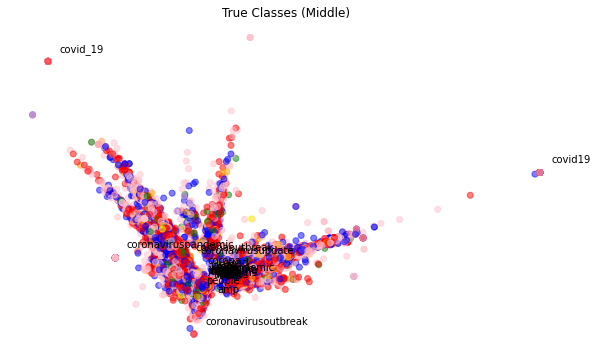

In [33]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_middle['sentiment']]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_middle[:, 0], reduced_data_middle[:, 1], color = colors, alpha = 0.5, label = colors)
for i, word in enumerate(words_middle):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Middle)')
plt.show()

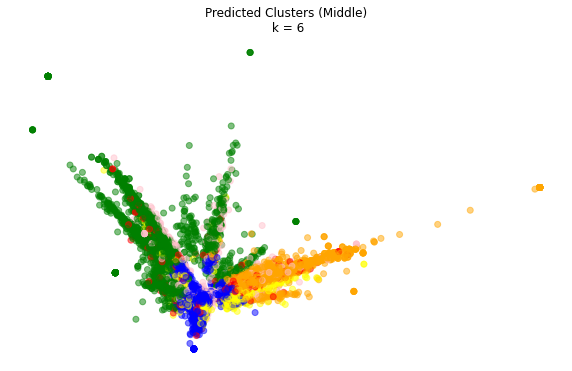

In [34]:
colors_p = [colordict[sentimentCategories[l]] for l in km_middle.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_middle[:, 0], reduced_data_middle[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Middle)\n k = 6')
plt.show()

In the above two figures, we get the clustered true and predicted labels of the observations of Middle tweets.

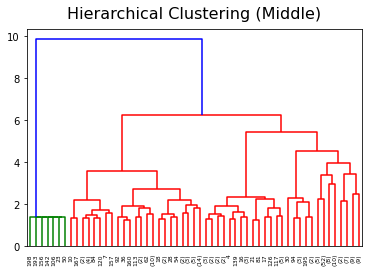

In [35]:
hier_middle = t_middle.sample(n=200)
hierTFVectorizer_middle = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_middle.fit_transform(hier_middle['text'])
CoocMat_middle = hierTFVects_early * hierTFVects_early.T
CoocMat_middle.setdiag(0)
examplelinkage_matrix_middle = scipy.cluster.hierarchy.ward(CoocMat_middle.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_middle, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Middle)',y=1.02,size=16)
plt.show()

In [36]:
hierarchicalClusters_middle = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_middle, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_middle['sentiment'], hierarchicalClusters_middle)))

For our complete clusters:
Homogeneity: 0.047
Completeness: 0.043
V-measure: 0.045
Adjusted Rand Score: 0.013


We applied Hierarchical Clustering with Wald's Method on the Middle tweets, with the original sampled with n = 200.

#### Late

In [37]:
numClusters = 6
km_late = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_late.fit(exampleTFVects_late)
exampleTFVectorizer_late.vocabulary_.get('trump')

901

In [38]:
exampleTransformer_late = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_late)
#train
exampleTF_late = exampleTransformer_late.transform(exampleTFVects_late)
print(exampleTF_late.shape)

(52327, 1000)


In [39]:
try:
    print(exampleTFVectorizer_late.vocabulary_['president'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

667


In [40]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_late['sentiment'], km_late.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_late['sentiment'], km_late.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_late['sentiment'], km_late.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_late['sentiment'], km_late.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [41]:
terms = exampleTFVectorizer_late.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_late.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 coronaviruspandemic
 people
 coronavirusoutbreak
 covid19
 just
 trump
 lockdown
 covidー19
 like
 pandemic


Cluster 1:
 covid_19
 quarantine
 people
 lockdown
 stayathome
 coronaviruspandemic
 time
 like
 stayhome
 corona


Cluster 2:
 amp
 stay
 home
 covid19
 safe
 friends
 family
 people
 support
 share


Cluster 3:
 covid19
 pandemic
 time
 help
 support
 need
 ll
 stayhome
 like
 health


Cluster 4:
 covid
 19
 covid19
 pandemic
 coronavirusoutbreak
 covid_19
 health
 new
 coronaviruspandemic
 positive


Cluster 5:
 cases
 new
 deaths
 total
 confirmed
 covid19
 number
 000
 reported
 positive




In [42]:
components = pca_late.components_
keyword_ids_late = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words from the kmeans model.
words_late = [terms[i] for i in keyword_ids_late]#Turn the ids into words.
x = components[:,keyword_ids_late][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids_late][1,:]

In [43]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_late['sentiment']]

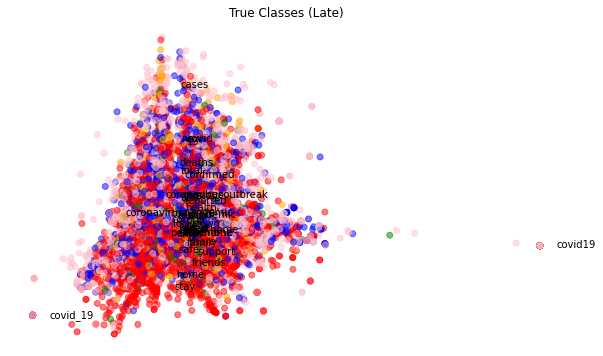

In [44]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_late[:, 0], reduced_data_late[:, 1], color = colors, alpha = 0.5, label = colors)
for i, word in enumerate(words_late):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Late)')
plt.show()

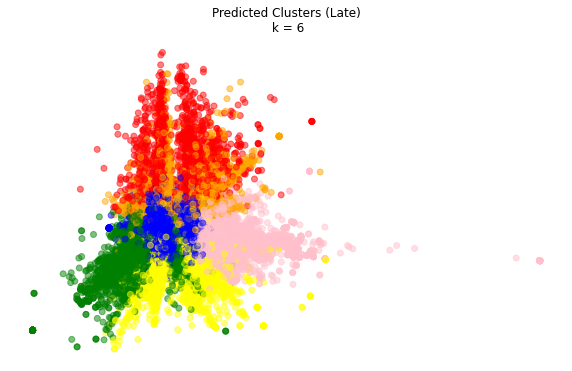

In [45]:
colors_p = [colordict[sentimentCategories[l]] for l in km_late.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_late[:, 0], reduced_data_late[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Late)\n k = 6')
plt.show()

In the above two figures, we get the clustered true and predicted labels of the observations of Late tweets.

Text(0.5, 1.02, 'Hierarchical Clustering (Late)')

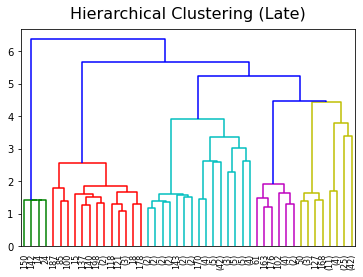

In [46]:
hier_late = t_late.sample(n=200)
hierTFVectorizer_late = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_late.fit_transform(hier_late['text'])
CoocMat_late = hierTFVects_early * hierTFVects_early.T
CoocMat_late.setdiag(0)
examplelinkage_matrix_late = scipy.cluster.hierarchy.ward(CoocMat_late.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_late, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Late)',y=1.02,size=16)

In [47]:
hierarchicalClusters_late = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_late, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_late['sentiment'], hierarchicalClusters_late)))

For our complete clusters:
Homogeneity: 0.052
Completeness: 0.054
V-measure: 0.053
Adjusted Rand Score: 0.007


We applied Hierarchical Clustering with Wald's Method on the Late tweets, with the original sampled with n = 200.

## Sentiment Analysis

This part is to do some sentiment analysis on the tweets. In the first step, we want to label all the reviews with their emotion(1 if the review is emotionally positive and -1 if negative) and train models to make predictions.This step is an unsupervised machine learning case.We will use three different perceptron models and also tune the hyperparameters to pick the optimal choice. In the second process, we want to use the unigram model to analyze which words most contribute to the reviews' emotion genre. This case aims to find words that strongly contribute to positive or negative emotion, and the results can be used for further movie analysis.

In [48]:
def convert(score):
    '''
    This function is to convert a sentiment analysis score into a sentiment
    analysis label. The label will be -1 if the analysis score is not bigger
    than 0.2 and 1 if the analysis score is bigger than 0.2.

    Input:
    score (number): the analysis score

    Output:
    the analysis label (number)
    '''
    if score <= 0.2:
        return -1
    return 1

In [49]:
for df in tweets:
    df['sentiment'] = df['sentiment_scores'].apply(lambda x: convert(x['compound']))

In [50]:
def bag_of_words(texts):
    '''
    This function is to extract unique words from all the texts for further
    unigram analysis. However, Since we are unable to create a too large numpy
    array, we just pick about 10% of the total word number with higher frequency
    to do the following analysis.

    Input:
    texts (list): a list of strings.

    Output:
    dictionary (dictionary): a dictionary where the keys are the unique words
      and the values are their own index.
    '''

    dictionary = {}
    all_words = []
    for text in texts:
        word_list = text.split()
        all_words.extend(word_list)

    words_count = dict(Counter(all_words))
    words_tuple = sorted(words_count.items(), key=lambda x: (-x[1], x[0]))
    for i, content in enumerate(words_tuple):
        dictionary[content[0]] = i

    return dictionary

In [51]:
def extract_bow_feature_vectors(reviews, dictionary):
    '''
    This function is to get the bag-of-words feature matrix representation of
    the data. The shape of the output will be (n, m), where n is the number of
    reviews and m the total number of words included in the dictionary that we
    want to analyze.

    Inputs:
    reviews (list): texts which are to be analyzed.
    dictionary (dictionary): a dictionary where the keys are the words and the
      values are their index.

    Ouput:
    feature_matrix (numpy matrix): the feature matrix representation of the
      texts.
    '''
    feature_matrix = np.zeros([len(reviews), len(dictionary)])
    for i, text in enumerate(reviews):
        word_list = text.split()
        for word in word_list:
            if word in dictionary:
                count = word_list.count(word)
                feature_matrix[i, dictionary[word]] = count
    return feature_matrix

In [52]:
def get_order(n_samples):
    '''
    This function is to get a fixed order, which will be used in querrying the
    elements in feature matrix representation of texts.

    Input:
    n_samples (number): total number of orders.

    Ouput:
    a list of ordered numbers which represent an index.
    '''

    try:
        with open(str(n_samples) + '.txt') as temp_file:
            line = temp_file.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [53]:
def perceptron(feature_matrix, labels, times):
    '''
    This function is to run the perceptron algorithm on data. We know that
    sklearn package contains algorithm for perceptron, however we want to
    emphasize the differences among the three algorithms. Therefore, we show the
    entire computing process of this algorithm.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    labels (list): labels of each review.
    times (number): the number of iteration times.

    Ouput:
    (theta, theta_0) (tuple): the trained theta and theta_0 for this algorithm.
    '''

    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            ips = 1e-8
            label = labels[i]
            feature_vector = feature_matrix[i]
            check = float(label*(theta.dot(feature_vector) + theta_0))
            if abs(check) < ips or check < 0:
                theta = theta + label*feature_vector
                theta_0 = theta_0 + label
    return (theta, theta_0)

In [54]:
def average_perceptron(feature_matrix, labels, times):
    '''
    This function is to run the average perceptron algorithm on data.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      texts.
    labels (list): labels of each text.
    times (number): the number of iteration times.

    Ouput:
    (theta_mean, theta_0_mean) (tuple): the trained theta and theta_0 for this
      algorithm.
    '''

    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0

    theta_sum, theta_0_sum = np.zeros(feature_matrix.shape[1]), 0
    amount = feature_matrix.shape[0]
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            ips = 1e-8
            label = labels[i]
            feature_vector = feature_matrix[i]
            check = float(label * (theta.dot(feature_vector) + theta_0))
            if abs(check) < ips or check < 0:
                theta = theta + label * feature_vector
                theta_0 = theta_0 + label
            theta_sum += theta
            theta_0_sum += theta_0
    theta_mean = (1 / (amount*times)) * theta_sum
    theta_0_mean = (1 / (amount*times)) * theta_0_sum

    return (theta_mean, theta_0_mean)

In [55]:
def pegasos_once(feature_vector, label, lambda_, eta, current_theta,\
    current_theta_0):
    '''
    This function is to run the pegasos algorithm on data for one step.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    label (list): labels of each text.
    lambda_ (number): a parameter used to update the algorithm.
    eta (number): a parameter used to update the algorithm.
    current_theta (numpy array): the initialized theta
    current_theta_0 (number): the initialized theta_0

    Ouputs:
    (current_theta, current_theta_0) (tuple): the trained theta and theta_0
      for this algorithm.
    '''

    check = label * (current_theta.dot(feature_vector) + current_theta_0)

    if check <= 1:
        current_theta = (1 - eta*lambda_) * current_theta +\
        eta*label*feature_vector
        current_theta_0 = current_theta_0 + eta*label
    else:
        current_theta = (1 - eta*lambda_) * current_theta

    return (current_theta, current_theta_0)

In [56]:
def pegasos(feature_matrix, labels, times, lambda_):
    '''
    This function is to run the entire process of pegasos algorithm on data.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      texts.
    label (list): labels of each text.
    times (number): the number of iteration times.
    lambda_ (number): a parameter used to update the algorithm.

    Ouput:
    (current_theta, current_theta_0) (tuple): the trained theta and theta_0
      for this algorithm.
    '''

    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            eta = 1/np.sqrt(time)
            time += 1
            theta, theta_0 = pegasos_once(feature_matrix[i, :],\
            labels[i], lambda_, eta, theta, theta_0)
    return (theta, theta_0)

In [57]:
def classify(feature_matrix, theta, theta_0):
    '''
    This function is to classify observations.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      texts.
    theta (numpy array): coefficients of different words.
    theta_0 (number): coefficient of the constant part.

    Ouput:
    check (numpy array): the classfied results of the observations.
    '''

    check = theta.dot(feature_matrix.T) + theta_0
    check[check > 0] = 1
    check[check < 0] = -1
    check[abs(check) < 1e-9] = -1

    return check

In [58]:
def accuracy(preds, targets):
    '''
    This function is to get the accuracy of the predictions over their true
    values.

    Inputs:
    preds (list or numpy series): the prediction values.
    targets (list or numpy series): the true values.

    Ouput:
    A number shows the accuracy of the prediction.
    '''

    return (preds == targets).mean()

In [59]:
def classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix,\
    train_labels, val_labels, **kwargs):
    '''
    This function is to get the accuracy of a certain algorithm on the training
    and validation datasets.

    Inputs:
    classifier (function): an algorithm.
    train_feature_matrix (numpy matrix): the feature matrix representation of
      the texts in the training dataset.
    val_feature_matrix (numpy matrix): the feature matrix representation of the
      texts in the validation dataset.
    train_labels (list): the sentiment labels of the texts in the training
      dataset.
    val_labels (list): the sentiment labels of the texts in the validation
      dataset.
    **kwargs: other parameters that may be needed in the algorithm function.

    Ouput:
    (train_ac, val_ac) (tuple): the accuracies on the training and validation
      datasets.
    '''

    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    pred_train = classify(train_feature_matrix, theta, theta_0)
    pred_val = classify(val_feature_matrix, theta, theta_0)

    train_ac = accuracy(pred_train, train_labels)
    val_ac = accuracy(pred_val, val_labels)

    return (train_ac, val_ac)

In [60]:
def tune_one_param(train_fn, param_vals, train_feats, train_labels, val_feats,\
    val_labels):
    '''
    This function is to tune one parameter of a certain algorithm on the
    training and validation datasets.

    Inputs:
    train_fn (function): an algorithm.
    param_vals (list): a list of possible chosen values for the parameter.
    train_feats (numpy matrix): the feature matrix representation of the texts
      in the training dataset.
    train_labels (list): the sentiment labels of the texts in the training
      dataset.
    val_feats (numpy matrix): the feature matrix representation of the texts
      in the validation dataset.
    val_labels (list): the sentiment labels of the texts in the validation
      dataset.

    Ouput:
    chosen_param (number): the optimal value for the parameter.
    '''

    chosen_param = 'undecided'
    chosen_cv_score = 0

    for val in param_vals:
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        val_preds = classify(val_feats, theta, theta_0)
        val_acc = accuracy(val_preds, val_labels)
        if val_acc > chosen_cv_score:
            chosen_cv_score = val_acc
            chosen_param = val

    return chosen_param

TS = [1, 5, 10, 15, 25, 50]
LS = [0.001, 0.01, 0.1, 1, 10]

In [61]:
def tune_two_params(train_fn, param_vals_1, param_vals_2, train_feats,\
    train_labels, val_feats, val_labels):
    '''
    This function is to tune two parameters of a certain algorithm on the
    training and validation datasets.

    Inputs:
    train_fn (function): an algorithm.
    param_vals_1 (list): a list of possible chosen values for the first
      parameter.
    param_vals_2 (list): a list of possible chosen values for the second
      parameter.
    train_feats (numpy matrix): the feature matrix representation of the texts
      in the training dataset.
    train_labels (list): the sentiment labels of the texts in the training
      dataset.
    val_feats (numpy matrix): the feature matrix representation of the texts
      in the validation dataset.
    val_labels (list): the sentiment labels of the texts in the validation
      dataset.

    Ouput:
    chosen_params (list): contains the optimal values for the two parameters.
    '''

    chosen_params = 'undecided'
    chosen_cv_score = 0

    for val_1 in param_vals_1:
        for val_2 in param_vals_2:
            theta, theta_0 = train_fn(train_feats, train_labels, val_1, val_2)

            val_preds = classify(val_feats, theta, theta_0)
            val_acc = accuracy(val_preds, val_labels)
            if val_acc > chosen_cv_score:
                chosen_params = [val_1, val_2]

    return chosen_params

In [62]:
def most_explanatory_word(theta, wordlist, emotion):
    """
    This cuntion is to get the word associated with the bag-of-words feature
    having largest weight in the diretion of postive or negative emotion.

    Inputs:
    theta (numpy array): coefficients of different words.
    wordlist (list): a list of words corresponding to the theta.
    emotion (str): 'positive' or 'negative'

    Ouput:
    a list of words arranged according to their coeffients ascendingly if we
    want to get the top words indicating the negative emotion and descendingly
    if postive signals are wanted.
    """
    if emotion == 'positive':
        return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))]

### Early

In [63]:
X_early, X_TEST_early, Y_early, Y_TEST_early = train_test_split(t_early['text'],\
    t_early['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_early, X_CV_early, Y_TRAIN_early, Y_CV_early = train_test_split(X_early, Y_early, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_early = X_TRAIN_early.tolist()
X_CV_LIST_early = X_CV_early.tolist()
X_TEST_LIST_early = X_TEST_early.tolist()
Y_TRAIN_LIST_early = Y_TRAIN_early.tolist()
Y_CV_LIST_early = Y_CV_early.tolist()
Y_TEST_LIST_early = Y_TEST_early.tolist()

In [64]:
DICTIONARY_early = bag_of_words(X_TRAIN_LIST_early)

In [65]:
TRAIN_BOW_FEATURES_early = extract_bow_feature_vectors(X_TRAIN_LIST_early, DICTIONARY_early)
CV_BOW_FEATURES_early = extract_bow_feature_vectors(X_CV_LIST_early, DICTIONARY_early)
TEST_BOW_FEATURES_early = extract_bow_feature_vectors(X_TEST_LIST_early, DICTIONARY_early)

In [66]:
PERCEPTRON_SCORES_early = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_early,\
    CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10)

AVG_PERCEPTRON_SCORES_early = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_early, CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10)

PEGASOS_SCORES_early = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_early,\
    CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10, lambda_=0.01)

ALGO_SCORES_early = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_early[0], AVG_PERCEPTRON_SCORES_early[0],\
PEGASOS_SCORES_early[0]], 'cv accuracy': [PERCEPTRON_SCORES_early[1],\
AVG_PERCEPTRON_SCORES_early[1], PEGASOS_SCORES_early[1]]}

ALGO_SCORES_DF_early = pd.DataFrame(ALGO_SCORES_early)
ALGO_SCORES_DF_early

,algorithm,train accuracy,cv accuracy
0,perceptron,0.972647,0.728589
1,average_perceptron,0.996782,0.740651
2,pegasos,0.809332,0.718938


We applied the three algorithms to the Early tweets, and we saw that the accuracies are relatively high. Therefore, we continue to tune the hyperparameters.

In [67]:
DATA_early = (TRAIN_BOW_FEATURES_early, Y_TRAIN_LIST_early, CV_BOW_FEATURES_early, Y_CV_LIST_early)

In [68]:
PERCEPTRON_CHOSEN_T_early = tune_one_param(perceptron, TS, *DATA_early)
AVG_PERCEPTRON_CHOSEN_T_early = tune_one_param(average_perceptron, TS, *DATA_early)
PEGASOS_CHOSEN_TL_early = tune_two_params(pegasos, TS, LS, *DATA_early)

TUNED_PERCEPTRON_TEST_SCORE_early = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_early, TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early,\
    times=PERCEPTRON_CHOSEN_T_early)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_early = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_early, TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early,\
    times=AVG_PERCEPTRON_CHOSEN_T_early)[1]

TUNED_PEGASOS_TEST_SCORE_early = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_early,\
    TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early, times=PEGASOS_CHOSEN_TL_early[0],\
    lambda_=PEGASOS_CHOSEN_TL_early[1])[1]

print('Perceptron (early):', TUNED_PERCEPTRON_TEST_SCORE_early)
print('Average perceptron (early):', TUNED_AVG_PERCEPTRON_TEST_SCORE_early)
print('Pegasos (early):', TUNED_PEGASOS_TEST_SCORE_early)

Perceptron (early): 0.7322074788902292
Average perceptron (early): 0.7201447527141134
Pegasos (early): 0.6815440289505428


We tuned the hyperparameters and trained the model, and we got the highest accuracy scores for each model as shown above. Since the score of the average perceptron is the highest, we choose this model.

In [135]:
BEST_THETAS_early = perceptron(TRAIN_BOW_FEATURES_early, Y_TRAIN_LIST_early, PERCEPTRON_CHOSEN_T_early)
WORDLIST_early = list(DICTIONARY_early.keys())
POSITIVE_WORDS_early = most_explanatory_word(BEST_THETAS_early[0], WORDLIST_early, 'positive')
TOP_10_POSITIVE_WORDS_early = POSITIVE_WORDS_early[:10]
NEGATIVE_WORDS_early = most_explanatory_word(BEST_THETAS_early[0], WORDLIST_early, 'negative')
TOP_10_NEGATIVE_WORDS_early = NEGATIVE_WORDS_early[:10]
print("Top 10 words that strongly indicate positive emotion include (early): ", '\n',\
    TOP_10_POSITIVE_WORDS_early)
print("Top 10 words that strongly indicate negative emotion include (early): ", '\n',\
    TOP_10_NEGATIVE_WORDS_early)

Top 10 words that strongly indicate positive emotion include (early):  
 ['positive', 'best', 'safe', 'sure', 'good', 'help', 'hand', 'chance', 'Please', 'protect']
Top 10 words that strongly indicate negative emotion include (early):  
 ['sick', 'stop', 'die', 'emergency', 'fear', 'crisis', 'deaths', 'dying', 'infected', 'isolation']


With the optimal model, we get the top words that strongly indicate positive/negative emotion.

### Middle

In [70]:
sample_middle = round(len(t_middle) * 0.2) + 1
t_sentiment_middle = t_late.sample(n=sample_middle)
X_middle, X_TEST_middle, Y_middle, Y_TEST_middle = train_test_split(t_sentiment_middle['text'],\
    t_sentiment_middle['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_middle, X_CV_middle, Y_TRAIN_middle, Y_CV_middle = train_test_split(X_middle, Y_middle, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_middle = X_TRAIN_middle.tolist()
X_CV_LIST_middle = X_CV_middle.tolist()
X_TEST_LIST_middle = X_TEST_middle.tolist()
Y_TRAIN_LIST_middle = Y_TRAIN_middle.tolist()
Y_CV_LIST_middle = Y_CV_middle.tolist()
Y_TEST_LIST_middle = Y_TEST_middle.tolist()

DICTIONARY_middle = bag_of_words(X_TRAIN_LIST_middle)

TRAIN_BOW_FEATURES_middle = extract_bow_feature_vectors(X_TRAIN_LIST_middle, DICTIONARY_middle)
CV_BOW_FEATURES_middle = extract_bow_feature_vectors(X_CV_LIST_middle, DICTIONARY_middle)
TEST_BOW_FEATURES_middle = extract_bow_feature_vectors(X_TEST_LIST_middle, DICTIONARY_middle)

In [71]:
PERCEPTRON_SCORES_middle = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_middle,
                                               CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10)

AVG_PERCEPTRON_SCORES_middle = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_middle, CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10)

PEGASOS_SCORES_middle = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_middle,\
    CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10, lambda_=0.01)

ALGO_SCORES_middle = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_middle[0], AVG_PERCEPTRON_SCORES_middle[0],\
PEGASOS_SCORES_middle[0]], 'cv accuracy': [PERCEPTRON_SCORES_middle[1],\
AVG_PERCEPTRON_SCORES_middle[1], PEGASOS_SCORES_middle[1]]}

ALGO_SCORES_DF_middle = pd.DataFrame(ALGO_SCORES_middle)
ALGO_SCORES_DF_middle

,algorithm,train accuracy,cv accuracy
0,perceptron,0.980761,0.699935
1,average_perceptron,0.996974,0.749190
2,pegasos,0.784911,0.691510


We applied the three algorithms to the Middle tweets, and we saw that the accuracies are relatively high. Therefore, we continue to tune the hyperparameters.

In [72]:
DATA_middle = (TRAIN_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, CV_BOW_FEATURES_middle, Y_CV_LIST_middle)

PERCEPTRON_CHOSEN_T_middle = tune_one_param(perceptron, TS, *DATA_middle)
AVG_PERCEPTRON_CHOSEN_T_middle = tune_one_param(average_perceptron, TS, *DATA_middle)
PEGASOS_CHOSEN_TL_middle = tune_two_params(pegasos, TS, LS, *DATA_middle)

TUNED_PERCEPTRON_TEST_SCORE_middle = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_middle, TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle,\
    times=PERCEPTRON_CHOSEN_T_middle)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_middle = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_middle, TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle,\
    times=AVG_PERCEPTRON_CHOSEN_T_middle)[1]

TUNED_PEGASOS_TEST_SCORE_middle = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_middle,\
    TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle, times=PEGASOS_CHOSEN_TL_middle[0],\
    lambda_=PEGASOS_CHOSEN_TL_middle[1])[1]

print('Perceptron (middle):', TUNED_PERCEPTRON_TEST_SCORE_middle)
print('Average perceptron (middle):', TUNED_AVG_PERCEPTRON_TEST_SCORE_middle)
print('Pegasos (middle):', TUNED_PEGASOS_TEST_SCORE_middle)

Perceptron (middle): 0.7258587167854829
Average perceptron (middle): 0.729747245625405
Pegasos (middle): 0.5910563836681789


We tuned the hyperparameters and trained the model, and we got the highest accuracy scores for each model as shown above. Since the accuracy score of the average perceptron is the highest, we choose this model.

In [73]:
BEST_THETAS_middle = average_perceptron(TRAIN_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, AVG_PERCEPTRON_CHOSEN_T_middle)
WORDLIST_middle = list(DICTIONARY_middle.keys())
POSITIVE_WORDS_middle = most_explanatory_word(BEST_THETAS_middle[0], WORDLIST_middle, 'positive')
TOP_10_POSITIVE_WORDS_middle = POSITIVE_WORDS_middle[:10]
NEGATIVE_WORDS_middle = most_explanatory_word(BEST_THETAS_middle[0], WORDLIST_middle, 'negative')
TOP_10_NEGATIVE_WORDS_middle = NEGATIVE_WORDS_middle[:10]
print("Top 10 words that strongly indicate positive emotion include (middle): ", '\n',\
    TOP_10_POSITIVE_WORDS_middle)
print("Top 10 words that strongly indicate negative emotion include (middle): ", '\n',\
    TOP_10_NEGATIVE_WORDS_middle)

Top 10 words that strongly indicate positive emotion include (middle):  
 ['best', 'safe', 'positive', 'support', 'hope', 'important', 'good', 'Please', 'save', 'care']
Top 10 words that strongly indicate negative emotion include (middle):  
 ['crisis', 'death', 'avoid', 'fighting', 'alone', 'kill', 'crisis.', 'worst', 'stop', 'infected']


With the optimal model, we get the top words that strongly indicate positive/negative emotion.

### Late

In [74]:
sample_late = round(len(t_late) * 0.2) + 1
t_sentiment_late = t_late.sample(n=sample_late)
X_late, X_TEST_late, Y_late, Y_TEST_late = train_test_split(t_sentiment_late['text'],\
    t_sentiment_late['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_late, X_CV_late, Y_TRAIN_late, Y_CV_late = train_test_split(X_late, Y_late, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_late = X_TRAIN_late.tolist()
X_CV_LIST_late = X_CV_late.tolist()
X_TEST_LIST_late = X_TEST_late.tolist()
Y_TRAIN_LIST_late = Y_TRAIN_late.tolist()
Y_CV_LIST_late = Y_CV_late.tolist()
Y_TEST_LIST_late = Y_TEST_late.tolist()

DICTIONARY_late = bag_of_words(X_TRAIN_LIST_late)

TRAIN_BOW_FEATURES_late = extract_bow_feature_vectors(X_TRAIN_LIST_late, DICTIONARY_late)
CV_BOW_FEATURES_late = extract_bow_feature_vectors(X_CV_LIST_late, DICTIONARY_late)
TEST_BOW_FEATURES_late = extract_bow_feature_vectors(X_TEST_LIST_late, DICTIONARY_late)

In [75]:
PERCEPTRON_SCORES_late = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_late,\
    CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10)

AVG_PERCEPTRON_SCORES_late = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_late, CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10)

PEGASOS_SCORES_late = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_late,\
    CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10, lambda_=0.01)

ALGO_SCORES_late = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_late[0], AVG_PERCEPTRON_SCORES_late[0],\
PEGASOS_SCORES_late[0]], 'cv accuracy': [PERCEPTRON_SCORES_late[1],\
AVG_PERCEPTRON_SCORES_late[1], PEGASOS_SCORES_late[1]]}

ALGO_SCORES_DF_late = pd.DataFrame(ALGO_SCORES_late)
ALGO_SCORES_DF_late

,algorithm,train accuracy,cv accuracy
0,perceptron,0.992037,0.752986
1,average_perceptron,0.997133,0.757764
2,pegasos,0.733397,0.693741


We applied the three algorithms to the Late tweets, and we saw that the accuracies are relatively high. Therefore, we continue to tune the hyperparameters.

In [76]:
DATA_late = (TRAIN_BOW_FEATURES_late, Y_TRAIN_LIST_late, CV_BOW_FEATURES_late, Y_CV_LIST_late)

PERCEPTRON_CHOSEN_T_late = tune_one_param(perceptron, TS, *DATA_late)
AVG_PERCEPTRON_CHOSEN_T_late = tune_one_param(average_perceptron, TS, *DATA_late)
PEGASOS_CHOSEN_TL_late = tune_two_params(pegasos, TS, LS, *DATA_late)

TUNED_PERCEPTRON_TEST_SCORE_late = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_late, TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late,\
    times=PERCEPTRON_CHOSEN_T_late)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_late = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_late, TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late,\
    times=AVG_PERCEPTRON_CHOSEN_T_late)[1]

TUNED_PEGASOS_TEST_SCORE_late = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_late,\
    TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late, times=PEGASOS_CHOSEN_TL_late[0],\
    lambda_=PEGASOS_CHOSEN_TL_late[1])[1]

print('Perceptron (late):', TUNED_PERCEPTRON_TEST_SCORE_late)
print('Average perceptron (late):', TUNED_AVG_PERCEPTRON_TEST_SCORE_late)
print('Pegasos (late):', TUNED_PEGASOS_TEST_SCORE_late)

Perceptron (late): 0.7511938872970392
Average perceptron (late): 0.7459407831900668
Pegasos (late): 0.5840496657115568


We tuned the hyperparameters and trained the model, and we got the highest accuracy scores for each model as shown above. Since the accuracy score of the perceptron is the highest, we choose this model.

In [136]:
BEST_THETAS_late = perceptron(TRAIN_BOW_FEATURES_late, Y_TRAIN_LIST_late, PERCEPTRON_CHOSEN_T_late)
WORDLIST_late = list(DICTIONARY_late.keys())
POSITIVE_WORDS_late = most_explanatory_word(BEST_THETAS_late[0], WORDLIST_late, 'positive')
TOP_10_POSITIVE_WORDS_late = POSITIVE_WORDS_late[:10]
NEGATIVE_WORDS_late = most_explanatory_word(BEST_THETAS_late[0], WORDLIST_late, 'negative')
TOP_10_NEGATIVE_WORDS_late = NEGATIVE_WORDS_late[:10]
print("Top 10 words that strongly indicate positive emotion include (late): ", '\n',\
    TOP_10_POSITIVE_WORDS_late)
print("Top 10 words that strongly indicate negative emotion include (late): ", '\n',\
    TOP_10_NEGATIVE_WORDS_late)

Top 10 words that strongly indicate positive emotion include (late):  
 ['great', 'positive', 'best', 'love', 'hand', 'Thank', 'hope', 'please', 'free', 'safe.']
Top 10 words that strongly indicate negative emotion include (late):  
 ['crisis', 'crisis.', 'death', 'infected', 'critical', 'stop', 'wrong', 'ass', 'fuck', 'isolation']


With the optimal model, we get the top words that strongly indicate positive/negative emotion.

## Gensim

In this part, we will use the Gensim model to analyze the topics of tweets in each dataset and visualize the results.

In [78]:
def dropMissing(wordLst, vocab):
    '''
    This function is to drop missing information.
    
    Input:
    wordLst (list/array): all words
    vocab (list/array): non-missing words
    
    Output:
    a list/array of non-missing words
    '''
    return [w for w in wordLst if w in vocab]

In [79]:
def add_tokens(df, TFVectorizer):
    '''
    This function is to extract tokens from tweets.
    
    Input:
    df (DataFrame): a DataFrame of tweets
    TFVectorizer (TfidfVectorizer): the TfidfVectorizer of the texts
    
    Output:
    df (DataFrame): a DataFrame of tweets with tokens
    '''
    df['tokenized_text'] = df['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
    df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
    df['reduced_tokens'] = df['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))
    return df

In [80]:
vectorizers = [exampleTFVectorizer_early, exampleTFVectorizer_middle, exampleTFVectorizer_late]
for i,df in enumerate(tweets):
    df = add_tokens(df, vectorizers[i])

#### Early

In [81]:
dictionary_early = gensim.corpora.Dictionary(t_early['reduced_tokens'])
corpus_early = [dictionary_early.doc2bow(text) for text in t_early['reduced_tokens']]
senlda_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, alpha='auto', eta='auto')
sen1Bow_early = dictionary_early.doc2bow(t_early['reduced_tokens'][0])
sen1lda_early = senlda_early[sen1Bow_early]
print("The topics of the text: {}".format(t_early['status_id'][0]))
print("are: {}".format(sen1lda_early))

The topics of the text: 1236600394521939968
are: [(0, 0.020813175), (1, 0.021905515), (2, 0.021785706), (3, 0.021964626), (4, 0.02160765), (5, 0.8067039), (6, 0.020254398), (7, 0.021406451), (8, 0.021155838), (9, 0.022402665)]


In the above analysis, we saw the topics related to the first observation in Early tweets and the weight of each topic.

In [82]:
ldaDF_early = pd.DataFrame({'status_id' : t_early['status_id'],'time':t_early['created_at'],
                          'topics' : [senlda_early[dictionary_early.doc2bow(l)] for l in t_early['reduced_tokens']]})

In [83]:
topicsProbDict_early = {i : [0] * len(ldaDF_early) for i in range(senlda_early.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF_early['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_early[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda_early.num_topics):
    ldaDF_early['topic_{}'.format(topicNum)] = topicsProbDict_early[topicNum]

In [84]:
ldaDFV_early = ldaDF_early[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_early = ldaDF_early[:10][['status_id']]
ldaDFVis_early = np.asmatrix(ldaDFV_early)
ldaDFVisNames_early = np.asmatrix(ldaDFVisN_early)

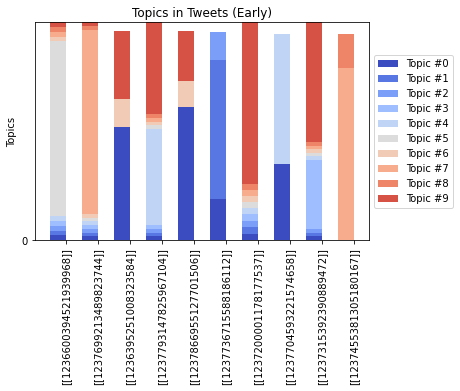

In [85]:
N = 10
ind = np.arange(N)
K = senlda_early.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_early)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_early)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_early)[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Tweets (Early)')
plt.xticks(ind+width/2, ldaDFVisNames_early, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

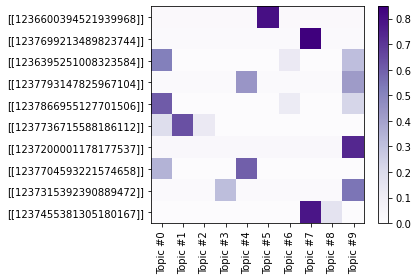

In [86]:
plt.pcolor(np.asarray(ldaDFVis_early), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_early.shape[0])+0.5, ldaDFVisNames_early);
plt.xticks(np.arange(ldaDFVis_early.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate 
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We visualized the topics of the first ten observations in the Early tweets.

In [87]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_early.show_topic(i))

Topic 0:
[('think', 0.04591542), ('coronavirus', 0.038818363), ('health', 0.023974415), ('time', 0.021463739), ('people', 0.021448337), ('amp', 0.01870268), ('public', 0.01807296), ('coronavirusoutbreak', 0.016315486), ('organization', 0.014536712), ('fast', 0.013932205)]
Topic 1:
[('case', 0.102400854), ('coronavirusoutbreak', 0.05808223), ('coronavirus', 0.043263737), ('new', 0.039640557), ('total', 0.03931524), ('like', 0.029159054), ('bring', 0.019257136), ('report', 0.019170959), ('virus', 0.018340314), ('question', 0.017302591)]
Topic 2:
[('coronavirus', 0.03381089), ('hand', 0.027338825), ('wash', 0.02526485), ('people', 0.02381832), ('amp', 0.022545978), ('coronavirusoutbreak', 0.022343675), ('come', 0.018127855), ('break', 0.018122712), ('sick', 0.016674949), ('home', 0.015745623)]
Topic 3:
[('coronavirusoutbreak', 0.1070956), ('coronavirus', 0.07383032), ('covid2019', 0.025352921), ('case', 0.023177305), ('italy', 0.02151454), ('covidー19', 0.021355106), ('india', 0.017629316)

In [88]:
topicsDict_early = {}
for topicNum in range(senlda_early.num_topics):
    topicWords = [w for w, p in senlda_early.show_topic(topicNum)]
    topicsDict_early['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF_early = pd.DataFrame(topicsDict_early)
wordRanksDF_early

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,think,case,coronavirus,coronavirusoutbreak,coronavirus,trump,people,coronavirus,travel,coronavirus
1,coronavirus,coronavirusoutbreak,hand,coronavirus,coronavirusoutbreak,lot,case,coronavirusoutbreak,new,coronavirusoutbreak
2,health,coronavirus,wash,covid2019,close,coronavirusoutbreak,say,corona,coronavirus,covid_19
3,time,new,people,case,kill,like,tell,covid_19,case,pandemic
4,people,total,amp,italy,test,thing,need,coronavirusupdate,state,amp
5,amp,like,coronavirusoutbreak,covidー19,wake,response,coronavirusoutbreak,covid,cancel,coverage
6,public,bring,come,india,virus,coronavirus,work,covid2019,city,outbreak
7,coronavirusoutbreak,report,break,coronavirusinindia,country,way,quarantine,people,test,news
8,organization,virus,sick,care,school,say,coronavirus,virus,spread,virus
9,fast,question,home,govt,emergency,look,infection,case,people,people


We can see the detailed information of the specific words and their weight in each topic.

<Figure size 432x288 with 0 Axes>

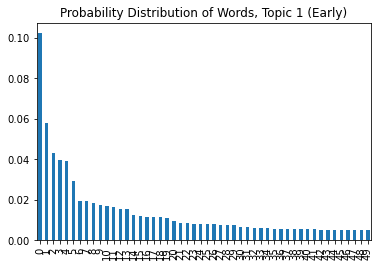

In [89]:
topic1_df_early = pd.DataFrame(senlda_early.show_topic(1, topn=50))
plt.figure()
topic1_df_early.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Early)')
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-90-fd2c792b6dd4>:8: DeprecationWarning: invalid escape sequence \e
  topic11_df_early.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
<ipython-input-90-fd2c792b6dd4>:9: DeprecationWarning: invalid escape sequence \e
  topic21_df_early.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')


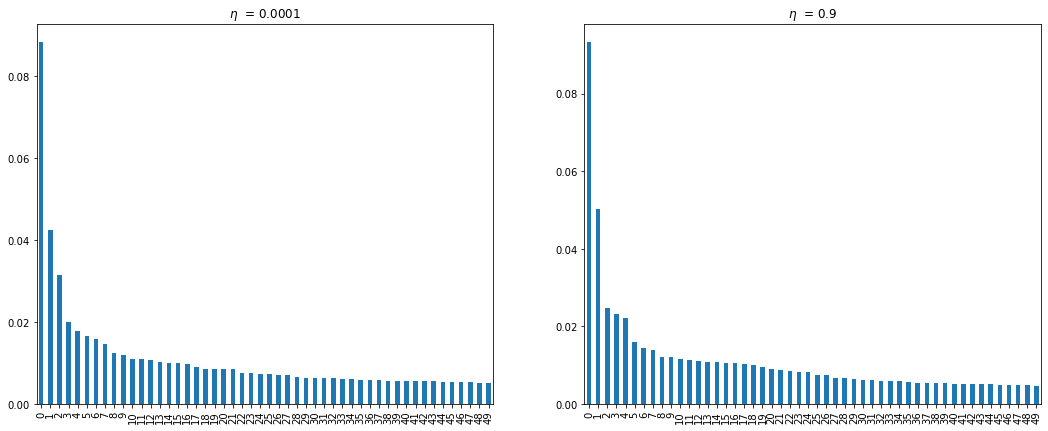

In [90]:
senlda1_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, eta = 0.00001)
senlda2_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, eta = 0.9)
topic11_df_early = pd.DataFrame(senlda1_early.show_topic(1, topn=50))
topic21_df_early = pd.DataFrame(senlda2_early.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_early.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
topic21_df_early.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

We can make the topics more unique by changing the parameters of the model, where $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings. We visualized the distribution of words over any single topic. The above example shows how different $\eta$ values can change the shape of the distribution.

#### Middle

In [91]:
dictionary_middle = gensim.corpora.Dictionary(t_middle['reduced_tokens'])
corpus_middle = [dictionary_middle.doc2bow(text) for text in t_middle['reduced_tokens']]
senlda_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, alpha='auto', eta='auto')
sen1Bow_middle = dictionary_middle.doc2bow(t_middle['reduced_tokens'][0].astype(str))
sen1lda_middle = senlda_middle[sen1Bow_middle]
print("The topics of the text: {}".format(t_middle.iloc[0,0]))
print("are: {}".format(sen1lda_middle))

The topics of the text: 1.2381593661943767e+18
are: [(0, 0.10399658), (1, 0.09794796), (2, 0.09202929), (3, 0.09449395), (4, 0.1037459), (5, 0.10408751), (6, 0.09946841), (7, 0.103212886), (8, 0.097014695), (9, 0.10400281)]


In the above analysis, we saw the topics related to the first observation in Middle tweets and the weight of each topic.

In [92]:
ldaDF_middle = pd.DataFrame({'status_id' : t_middle['status_id'],'time':t_middle['created_at'],
                          'topics' : [senlda_middle[dictionary_middle.doc2bow(l)] for l in t_middle['reduced_tokens']]})

In [93]:
topicsProbDict_middle = {i : [0] * len(ldaDF_middle) for i in range(senlda_middle.num_topics)}

In [94]:
for index, topicTuples in enumerate(ldaDF_middle['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_middle[topicNum][index] = prob
for topicNum in range(senlda_middle.num_topics):
    ldaDF_middle['topic_{}'.format(topicNum)] = topicsProbDict_middle[topicNum]

In [95]:
ldaDFV_middle = ldaDF_middle[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_middle = ldaDF_middle[:10][['status_id']]
ldaDFVis_middle = np.asmatrix(ldaDFV_middle)
ldaDFVisNames_middle = np.asmatrix(ldaDFVisN_middle)

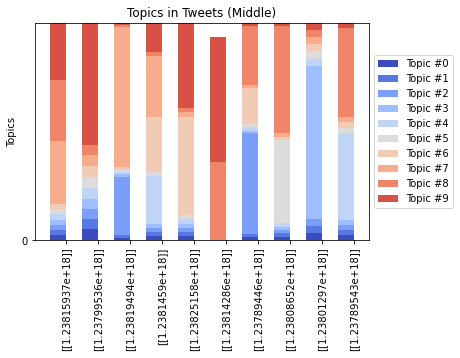

In [96]:
N = 10
ind = np.arange(N)
K = senlda_middle.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_middle)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_middle)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_middle)[:, k]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')
plt.title('Topics in Tweets (Middle)')
plt.xticks(ind+width/2, ldaDFVisNames_middle, rotation='vertical')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))
plt.show()

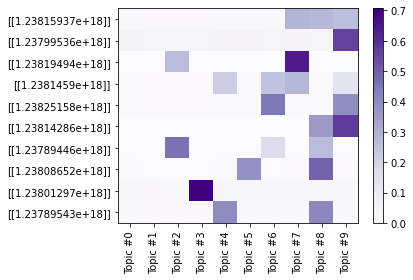

In [97]:
plt.pcolor(np.asarray(ldaDFVis_middle), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_middle.shape[0])+0.5, ldaDFVisNames_middle);
plt.xticks(np.arange(ldaDFVis_middle.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We visualized the topics of the first ten observations in the Middle tweets.

In [98]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_middle.show_topic(i))

Topic 0:
[('home', 0.07641599), ('stay', 0.06887814), ('covid19', 0.060535856), ('work', 0.040641744), ('safe', 0.037533693), ('time', 0.03553239), ('people', 0.021671344), ('house', 0.015721085), ('feel', 0.013739011), ('love', 0.013548531)]
Topic 1:
[('test', 0.08219249), ('help', 0.073763855), ('covid19', 0.06463081), ('friend', 0.030900152), ('family', 0.024662724), ('positive', 0.023636324), ('community', 0.022492716), ('people', 0.02192543), ('need', 0.020780692), ('try', 0.019398713)]
Topic 2:
[('amp', 0.07409614), ('covid19', 0.048194837), ('know', 0.033816732), ('people', 0.032821245), ('hand', 0.032354333), ('question', 0.02131847), ('time', 0.017597305), ('wash', 0.016834345), ('mask', 0.015884884), ('tell', 0.015763277)]
Topic 3:
[('case', 0.08764967), ('covid19', 0.0659801), ('new', 0.044063196), ('death', 0.03760174), ('italy', 0.031733233), ('virus', 0.026515119), ('patient', 0.022712007), ('china', 0.021875456), ('government', 0.020272674), ('spread', 0.018401127)]
Topi

In [99]:
topicsDict_middle = {}
for topicNum in range(senlda_middle.num_topics):
    topicWords = [w for w, p in senlda_middle.show_topic(topicNum)]
    topicsDict_middle['Topic_{}'.format(topicNum)] = topicWords

In [100]:
wordRanksDF_middle = pd.DataFrame(topicsDict_middle)
wordRanksDF_middle

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,home,test,amp,case,covid19,covid19,covid19,covid19,covid19,coronavirusupdate
1,stay,help,covid19,covid19,update,pandemic,social,support,like,covid_19
2,covid19,covid19,know,new,close,quarantine,let,trump,fight,covid19
3,work,friend,people,death,business,crisis,people,share,day,coronavirusoutbreak
4,safe,family,hand,italy,school,health,distance,time,china,coronaviruspandemic
5,time,positive,question,virus,march,self,right,care,look,corona
6,people,community,time,patient,learn,isolation,need,need,world,lockdown
7,house,people,wash,china,state,public,come,video,watch,socialdistancing
8,feel,need,mask,government,amp,work,stop,news,play,coronacrisis
9,love,try,tell,spread,city,company,know,thank,amp,covid2019


We can see the detailed information of the specific words and their weight in each topic.

<Figure size 432x288 with 0 Axes>

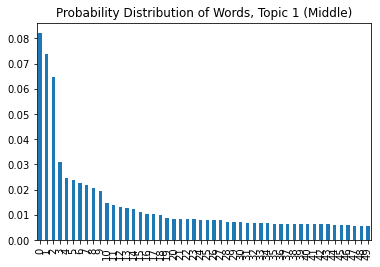

In [101]:
topic1_df_middle = pd.DataFrame(senlda_middle.show_topic(1, topn=50))
plt.figure()
topic1_df_middle.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Middle)')
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-102-f934895b1ff8>:8: DeprecationWarning: invalid escape sequence \e
  topic11_df_middle.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
<ipython-input-102-f934895b1ff8>:9: DeprecationWarning: invalid escape sequence \e
  topic21_df_middle.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')


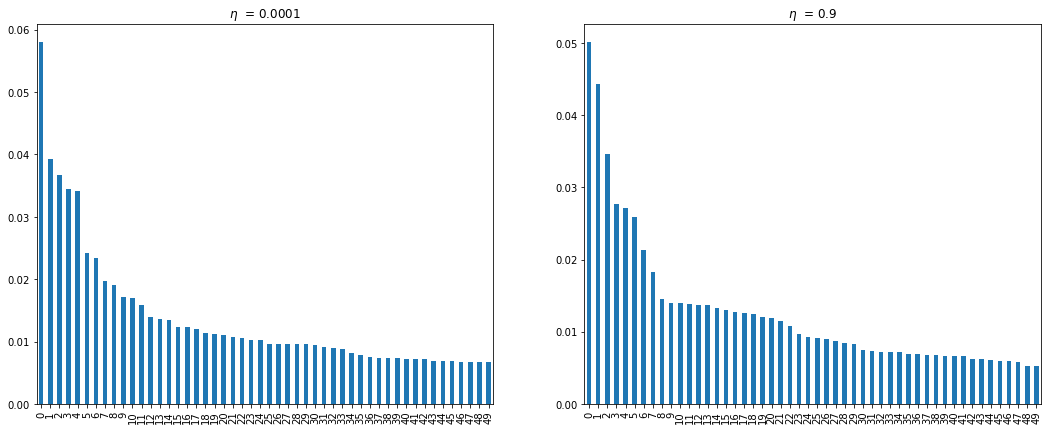

In [102]:
senlda1_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, eta = 0.00001)
senlda2_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, eta = 0.9)
topic11_df_middle = pd.DataFrame(senlda1_middle.show_topic(1, topn=50))
topic21_df_middle = pd.DataFrame(senlda2_middle.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_middle.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
topic21_df_middle.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

We can make the topics more unique by changing the parameters of the model, where $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings. We visualized the distribution of words over any single topic. The above example shows how different $\eta$ values can change the shape of the distribution.

#### Late

In [103]:
dictionary_late = gensim.corpora.Dictionary(t_late['reduced_tokens'])
corpus_late = [dictionary_late.doc2bow(text) for text in t_late['reduced_tokens']]
senlda_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, alpha='auto', eta='auto')
sen1Bow_late = dictionary_late.doc2bow(t_late['reduced_tokens'][0].astype(str))
sen1lda_late = senlda_late[sen1Bow_late]

In [104]:
print("The topics of the text: {}".format(t_late.iloc[0,0]))
print("are: {}".format(sen1lda_late))

The topics of the text: 1241225643234406406
are: [(0, 0.11585152), (1, 0.063173644), (2, 0.052012824), (3, 0.09811876), (4, 0.1086971), (5, 0.107367024), (6, 0.095483504), (7, 0.107394665), (8, 0.11803488), (9, 0.1338661)]


In the above analysis, we saw the topics related to the first observation in Late tweets and the weight of each topic.

In [105]:
ldaDF_late = pd.DataFrame({'status_id' : t_late['status_id'],'time':t_late['created_at'],
                          'topics' : [senlda_late[dictionary_late.doc2bow(l)] for l in t_late['reduced_tokens']]})
topicsProbDict_late = {i : [0] * len(ldaDF_late) for i in range(senlda_late.num_topics)}

In [106]:
for index, topicTuples in enumerate(ldaDF_late['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_late[topicNum][index] = prob
for topicNum in range(senlda_late.num_topics):
    ldaDF_late['topic_{}'.format(topicNum)] = topicsProbDict_late[topicNum]

In [107]:
ldaDFV_late = ldaDF_late[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_late = ldaDF_late[:10][['status_id']]
ldaDFVis_late = np.asmatrix(ldaDFV_late)
ldaDFVisNames_late = np.asmatrix(ldaDFVisN_late)

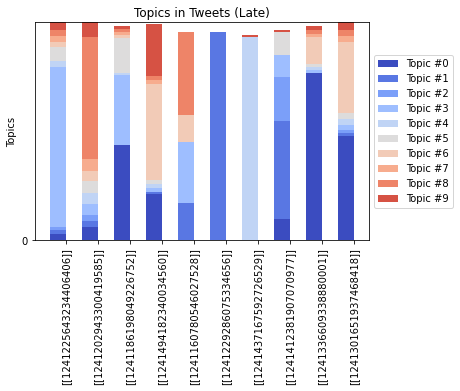

In [108]:
N = 10
ind = np.arange(N)
K = senlda_late.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_late)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_late)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_late)[:, k]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')
plt.title('Topics in Tweets (Late)')
plt.xticks(ind+width/2, ldaDFVisNames_late, rotation='vertical')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))
plt.show()

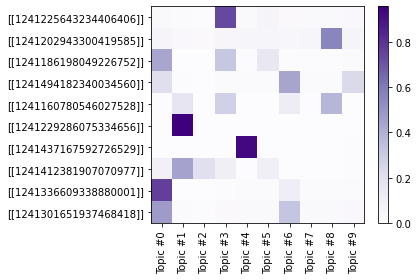

In [109]:
plt.pcolor(np.asarray(ldaDFVis_late), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_late.shape[0])+0.5, ldaDFVisNames_late);
plt.xticks(np.arange(ldaDFVis_late.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We visualized the topics of the first ten observations in the Middle tweets.

In [110]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_late.show_topic(i))

Topic 0:
[('covid19', 0.066672936), ('stay', 0.057962157), ('covid_19', 0.056892365), ('home', 0.054604493), ('stayhome', 0.031354822), ('corona', 0.031260733), ('stayathome', 0.02789843), ('safe', 0.026973065), ('quarantine', 0.025258195), ('coronavirusoutbreak', 0.02384225)]
Topic 1:
[('amp', 0.102784514), ('fight', 0.0960389), ('people', 0.060596302), ('come', 0.057696007), ('covid19', 0.05599865), ('pm', 0.03598253), ('month', 0.02844215), ('govt', 0.025155386), ('protect', 0.023669776), ('join', 0.023293259)]
Topic 2:
[('mask', 0.12159391), ('family', 0.11716833), ('share', 0.09970049), ('try', 0.091367), ('time', 0.08832946), ('friend', 0.084712505), ('covid19', 0.06314208), ('wear', 0.062003314), ('stand', 0.040351037), ('face', 0.032329205)]
Topic 3:
[('covid19', 0.059163857), ('lockdown', 0.03335915), ('people', 0.026694383), ('thank', 0.022851406), ('covid_19', 0.022695845), ('world', 0.022619877), ('country', 0.022040343), ('day', 0.020627635), ('woman', 0.017515626), ('know

In [111]:
topicsDict_late = {}
for topicNum in range(senlda_late.num_topics):
    topicWords = [w for w, p in senlda_late.show_topic(topicNum)]
    topicsDict_late['Topic_{}'.format(topicNum)] = topicWords

In [112]:
wordRanksDF_late = pd.DataFrame(topicsDict_late)
wordRanksDF_late

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,covid19,amp,mask,covid19,case,covid19,covid19,covid19,covid19,covid19
1,stay,fight,family,lockdown,covid19,people,pandemic,deliver,trump,amp
2,covid_19,people,share,people,death,covid_19,virus,support,like,help
3,home,come,try,thank,test,time,people,hospital,coronavirustruth,pandemic
4,stayhome,covid19,time,covid_19,new,food,doctor,official,say,business
5,corona,pm,friend,world,report,pay,world,worker,covid_19,read
6,stayathome,month,covid19,country,positive,watch,god,act,people,service
7,safe,govt,wear,day,total,amp,cause,work,president,response
8,quarantine,protect,stand,woman,china,happen,listen,sign,stop,need
9,coronavirusoutbreak,join,face,know,update,make,story,patient,know,crisis


We can see the detailed information of the specific words and their weight in each topic.

<Figure size 432x288 with 0 Axes>

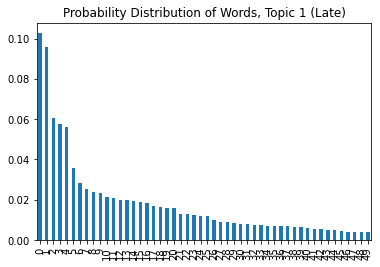

In [113]:
topic1_df_late = pd.DataFrame(senlda_late.show_topic(1, topn=50))
plt.figure()
topic1_df_late.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Late)')
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-114-3bb9b6c0c0ba>:8: DeprecationWarning: invalid escape sequence \e
  topic11_df_late.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
<ipython-input-114-3bb9b6c0c0ba>:9: DeprecationWarning: invalid escape sequence \e
  topic21_df_late.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')


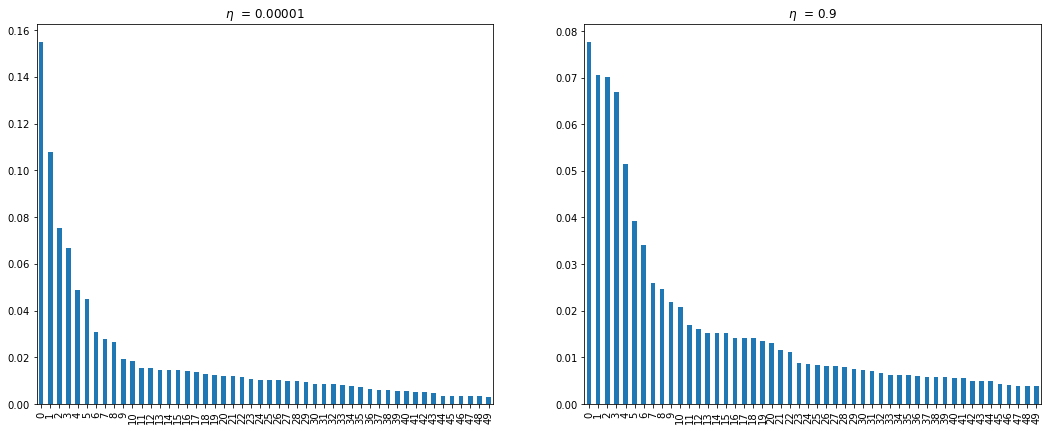

In [114]:
senlda1_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, eta = 0.00001)
senlda2_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, eta = 0.9)
topic11_df_late = pd.DataFrame(senlda1_late.show_topic(1, topn=50))
topic21_df_late = pd.DataFrame(senlda2_late.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_late.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df_late.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

We can make the topics more unique by changing the parameters of the model, where $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings. We visualized the distribution of words over any single topic. The above example shows how different $\eta$ values can change the shape of the distribution.

## Dynamic Topic Modelling

In this part, we want to create a dynamic model for the tweets in March. We will see the change of numbers per day and per stage, and explore the dynamic model of each stage.

### Change per Day

In [115]:
all_tweets = [t_early,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31]
lens_day = [len(x) for x in all_tweets]

In [116]:
days = []
for i in range(12,32):
    sub_str = '03-'+ str(i)
    days.append(sub_str)
days.insert(0,'before 03-12')

Text(0.5, 1.02, 'Number of Tweets in March per Day')

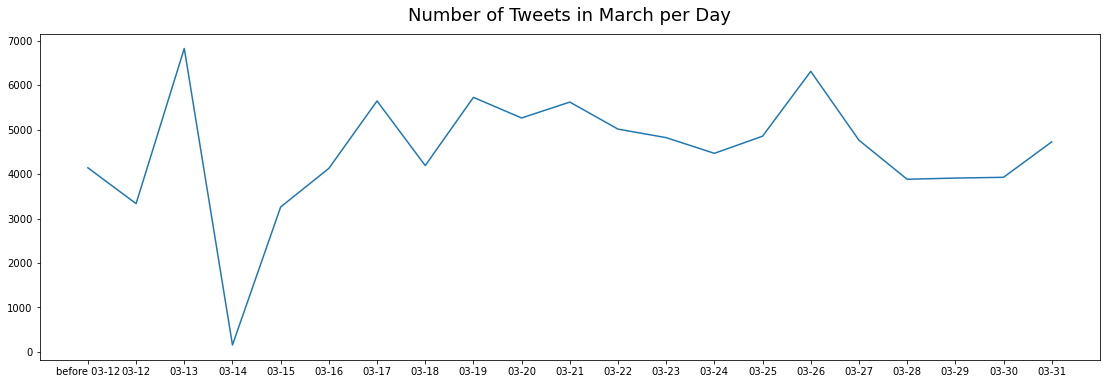

In [117]:
fig = plt.figure(figsize = (19,6))
plt.plot(days,lens_day)
plt.title('Number of Tweets in March per Day', size = 18, y = 1.02)

### Change per Stage

Text(0.5, 1.02, 'Number of Tweets in March per Stage')

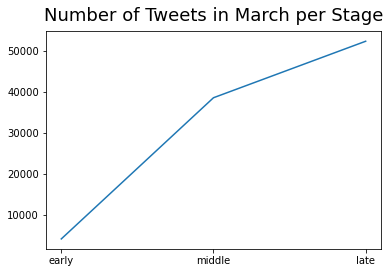

In [118]:
middle_tweets = sum(lens_day[1:10])
late_tweets = sum(lens_day[10:])
lens_stage = [lens_day[0], middle_tweets, late_tweets]
stages = ['early', 'middle', 'late']
plt.plot(stages,lens_stage)
plt.title('Number of Tweets in March per Stage', size = 18, y = 1.02)

In [119]:
t_all = pd.concat([t_early, t_middle, t_late],axis = 0)

In [120]:
dictionary_all = gensim.corpora.Dictionary(t_all['reduced_tokens'])
corpus_all = [dictionary_early.doc2bow(text) for text in t_all['reduced_tokens']]

In [121]:
#ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus_all, id2word=dictionary_all, time_slice=lens_stage, num_topics=10)
#ldaseq.save("ldaseqmodel")
ldaseq = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")

Since getting the model is very time-consuming, we suggest you direcely load the generated model instead of getting the model again.

In [122]:
# Topics for the early stage
early_lda = ldaseq.print_topics(time=0) 

In [123]:
#Topics for the middle stage
middle_lda = ldaseq.print_topics(time=1) 

In [124]:
#Topics for the late stage
late_lda = ldaseq.print_topics(time=2) 

In [125]:
def get_df(lda):
    '''
    This function is get a DataFrame of top 10 words in each of the topics of an Idaseq Model.
    
    Input:
    lda (an Idaseq Model): a model
    
    Output:
    a processed DataFrame
    '''
    topics = {}
    for i in range(len(lda)):
        topic = [m[0] for m in lda[i][:10]]
        string = "Topic_"+str(i)
        topics[string] = topic
    return pd.DataFrame(topics)

In [126]:
get_df(early_lda)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,help,like,coronavirusoutbreak,hand,test,amp,stay,day,pandemic,case
1,health,coronaviruspandemic,virus,spread,close,work,home,quarantine,trump,new
2,need,know,corona,covid_19,school,business,people,week,world,death
3,support,think,covidー19,watch,positive,pay,safe,year,country,report
4,care,people,coronavirusupdate,ask,state,food,time,feel,crisis,lockdown
5,community,look,coronaviruspandemic,wash,say,home,social,self,live,italy
6,thank,good,china,question,order,company,try,covid_19,president,total
7,hospital,thing,covid2019,stop,uk,help,family,time,response,update
8,medical,right,covid_19,video,march,service,let,month,say,country
9,information,covid_19,covid,soon,people,essential,share,house,global,india


In [127]:
get_df(middle_lda)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,help,like,coronavirusoutbreak,hand,test,amp,stay,day,pandemic,case
1,health,coronaviruspandemic,virus,spread,close,work,home,quarantine,trump,new
2,need,know,corona,covid_19,school,business,people,week,world,death
3,support,people,covidー19,watch,positive,pay,time,year,country,report
4,care,think,coronaviruspandemic,ask,state,food,safe,feel,crisis,lockdown
5,community,look,china,wash,say,home,social,self,live,italy
6,thank,good,coronavirusupdate,question,order,help,try,covid_19,president,total
7,hospital,right,covid2019,video,uk,company,family,time,response,update
8,medical,thing,covid_19,stop,march,job,let,month,say,india
9,doctor,covid_19,covid,soon,people,service,share,house,global,country


In [128]:
get_df(late_lda)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,help,like,coronavirusoutbreak,hand,test,amp,stay,day,pandemic,case
1,health,coronaviruspandemic,virus,spread,close,work,home,quarantine,trump,new
2,support,know,corona,covid_19,positive,business,people,week,world,death
3,need,people,covidー19,watch,state,pay,safe,year,country,lockdown
4,care,think,coronaviruspandemic,video,say,food,time,feel,crisis,report
5,thank,right,china,ask,school,home,family,self,live,italy
6,deliver,look,covid2019,wash,order,job,try,covid_19,president,total
7,hospital,good,covid_19,question,uk,company,social,time,response,update
8,medical,thing,covid,stop,march,help,share,month,say,india
9,mask,covid_19,coronavirusupdate,soon,people,essential,let,house,global,rate


In [138]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=0, corpus=corpus_all)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, 
                               vocab=vocab, term_frequency=term_frequency)

In [143]:
pyLDAvis.enable_notebook()
viz = pyLDAvis.display(vis_wrapper)
viz

In the above analysis, we extracted the models for each stage. In addition, we visualized the dynamic model. We can see the relationship among the different topics and how important of a specific (top) word in a topic.